In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [8]:
# Load the dataset
file_path = 'twitter_training.csv'  # Update this path to your dataset file
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: No data found in the file.")
    exit()
except pd.errors.ParserError:
    print("Error: Issue with parsing the file. Ensure the delimiter is correct.")
    exit()
except Exception as e:
    print(f"Error loading or preprocessing data: {e}")
    exit()

Data loaded successfully.


In [10]:
# Display basic information about the dataset
print("Data info:")
print(data.info())
print("First few rows:")
print(data.head())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
First few rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you

In [16]:
print(data.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [28]:
column_names = ['id', 'topic', 'sentiment', 'text']
data = pd.read_csv(file_path, header=None, names=column_names)


In [32]:
print(data['text'].isna().sum())


686


In [34]:
data = data.dropna(subset=['text'])


In [36]:
data['text'] = data['text'].fillna('')


In [38]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text


In [40]:
# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)


In [42]:
# Encode sentiment labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])


In [44]:
# Define features and target
X = data['cleaned_text']
y = data['sentiment_encoded']


In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [50]:
# Initialize and train the classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [54]:

# Make predictions
y_pred = clf.predict(X_test_tfidf)


In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.74      0.33      0.45      4023
    Negative       0.60      0.80      0.69      6598
     Neutral       0.67      0.51      0.58      5421
    Positive       0.60      0.73      0.66      6157

    accuracy                           0.63     22199
   macro avg       0.65      0.59      0.60     22199
weighted avg       0.64      0.63      0.61     22199

Confusion Matrix:
[[1313 1185  432 1093]
 [ 123 5306  448  721]
 [ 203 1307 2756 1155]
 [ 131 1031  485 4510]]


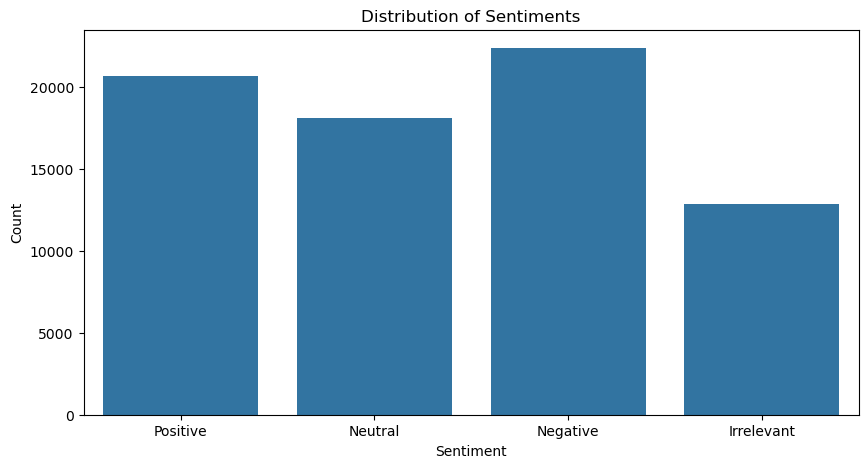

In [58]:
# Visualize the distribution of sentiments
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

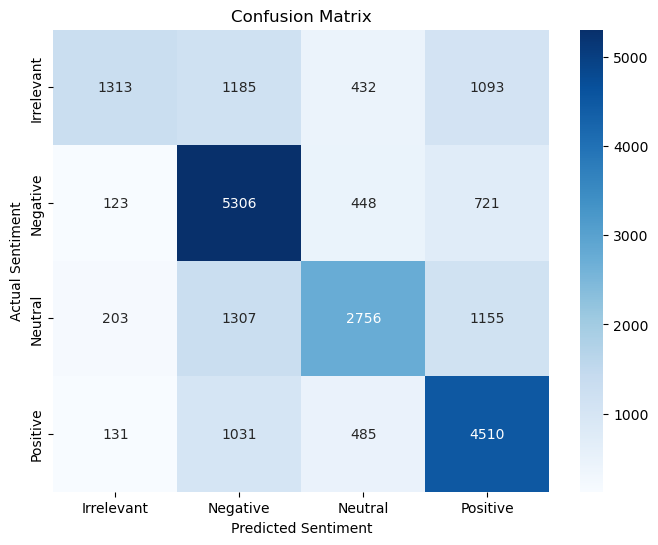

In [60]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()
